In [44]:
%matplotlib inline

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns  # Seaborn para el pairplot
import os 

# Cambiar el directorio de trabajo
os.chdir("/Users/gilgu/OneDrive/Escritorio")

# Cargar nuevamente el dataset
df = pd.read_csv('Municipal-Delitos-2015-2021_dic2021.csv', encoding='ISO-8859-1')

In [46]:
df

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589457,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
1589458,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
1589459,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
1589460,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Seleccionar las columnas numéricas que serán utilizadas para el análisis
columnas_de_datos = ['Enero', 'Febrero', 'Marzo', 'Abril', 
                     'Mayo', 'Junio', 'Julio', 'Agosto', 
                     'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [48]:
# Asegurarse de que no haya valores nulos en estas columnas
df[columnas_de_datos] = df[columnas_de_datos].fillna(0)

In [49]:
# Escalar los datos utilizando StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columnas_de_datos])


In [50]:
# Determinar número de clusters con el método del codo
wcss = []
for i in range(1, 11):
    print(f'Procesando número de clusters: {i}')  # Mostrar el progreso
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


Procesando número de clusters: 1
Procesando número de clusters: 2
Procesando número de clusters: 3
Procesando número de clusters: 4
Procesando número de clusters: 5
Procesando número de clusters: 6
Procesando número de clusters: 7
Procesando número de clusters: 8
Procesando número de clusters: 9
Procesando número de clusters: 10


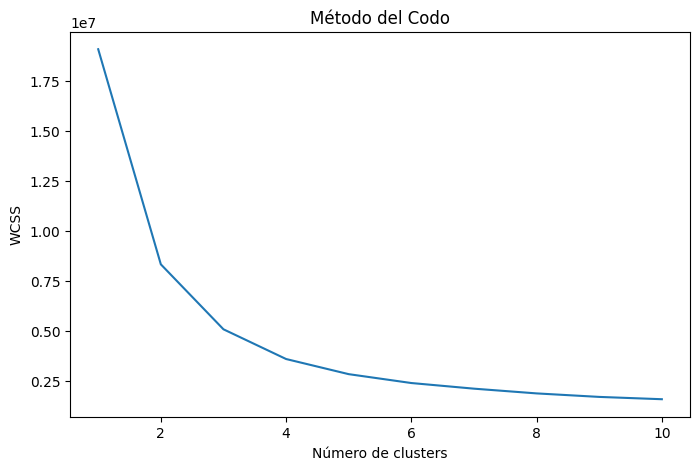

In [51]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Usar KneeLocator para determinar el número óptimo de clusters
kneedle = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
n_clusters_optimo = kneedle.elbow

In [53]:
# Imprimir el número óptimo de clusters
print(f'El número óptimo de clusters es: {n_clusters_optimo}')

El número óptimo de clusters es: 3


In [54]:
# Ajustar el modelo KMeans con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=n_clusters_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

In [55]:

# Ver los resultados de los clusters asignados
print("Asignación de clusters:")
print(df[['Municipio', 'Cluster']])  # Supongamos que hay una columna 'Municipio' en el dataset

Asignación de clusters:
                     Municipio  Cluster
0               Aguascalientes        0
1               Aguascalientes        0
2               Aguascalientes        0
3               Aguascalientes        0
4               Aguascalientes        0
...                        ...      ...
1589457  Santa María de la Paz        0
1589458  Santa María de la Paz        0
1589459  Santa María de la Paz        0
1589460  Santa María de la Paz        0
1589461  Santa María de la Paz        0

[1589462 rows x 2 columns]


In [56]:
# Crear un subset del dataframe para pruebas
df_sample = df.sample(n=1000, random_state=42)  # Seleccionar una muestra aleatoria de 1000 filas

In [57]:
# Usar solo 4 columnas para reducir el tiempo de procesamiento
columnas_reducidas = ['Enero', 'Abril', 'Julio', 'Octubre']

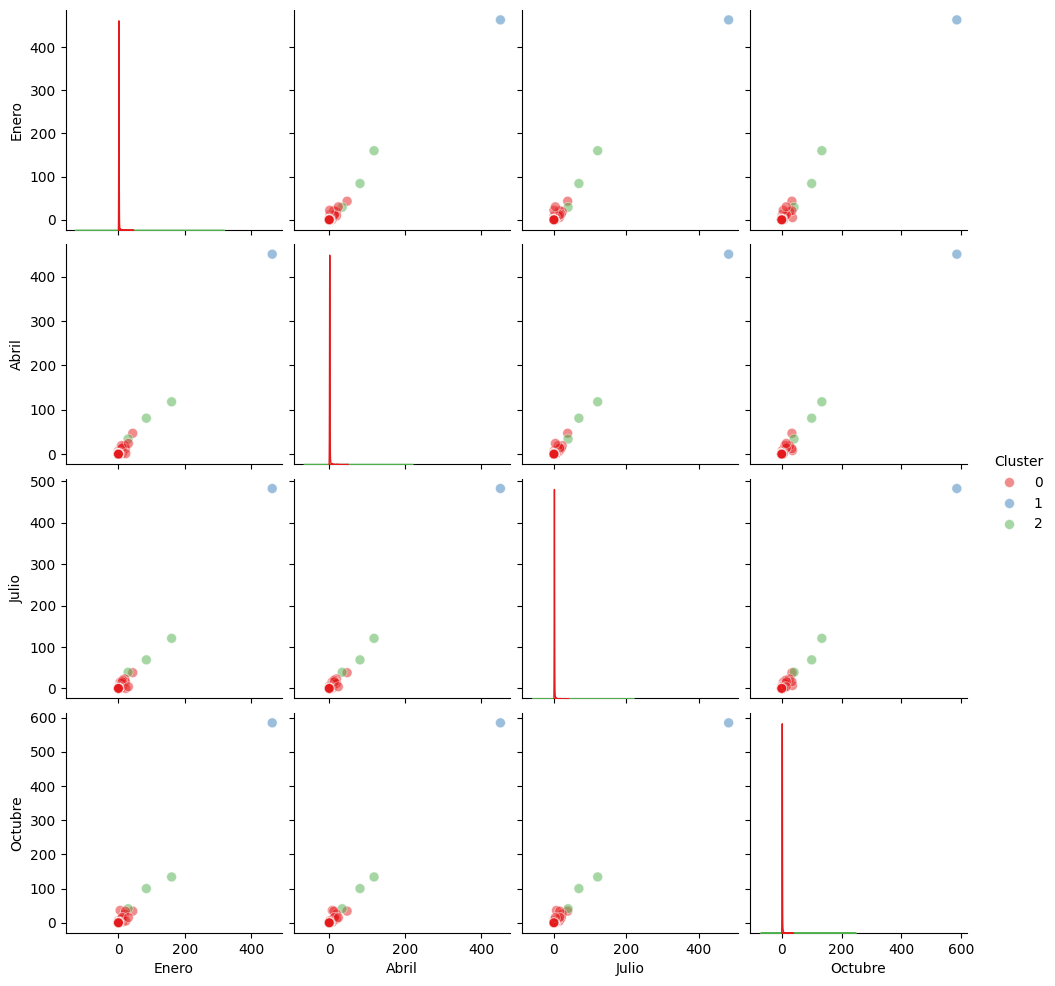

In [58]:
# Crear el pairplot con la muestra y las columnas reducidas
pairplot_fig = sns.pairplot(df_sample[columnas_reducidas + ['Cluster']], hue='Cluster', palette='Set1', plot_kws={'alpha':0.5, 's':50})

In [59]:
# Añadir título al pairplot
pairplot_fig.fig.suptitle('Pairplot de delitos por mes, coloreado por Cluster (muestra y columnas reducidas)', y=1.02)



Text(0.5, 1.02, 'Pairplot de delitos por mes, coloreado por Cluster (muestra y columnas reducidas)')

In [60]:
# Forzar el ajuste de los gráficos si no se muestra automáticamente
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [64]:
# Mostrar el gráfico
plt.show()

In [65]:
# Guardar el gráfico como archivo si no se muestra en pantalla
pairplot_fig.fig.savefig('pairplot_delitos.png')


In [66]:


# Si quieres guardar en otra ubicación, especifica la ruta completa
# plt.savefig('/ruta/donde/quieras/guardar/grafico_pairplot.png', dpi=300)

# Mostrar el gráfico (opcional)
plt.suptitle('Pairplot de delitos por mes, coloreado por Cluster (muestra)', y=1.02)
plt.show()


<Figure size 640x480 with 0 Axes>

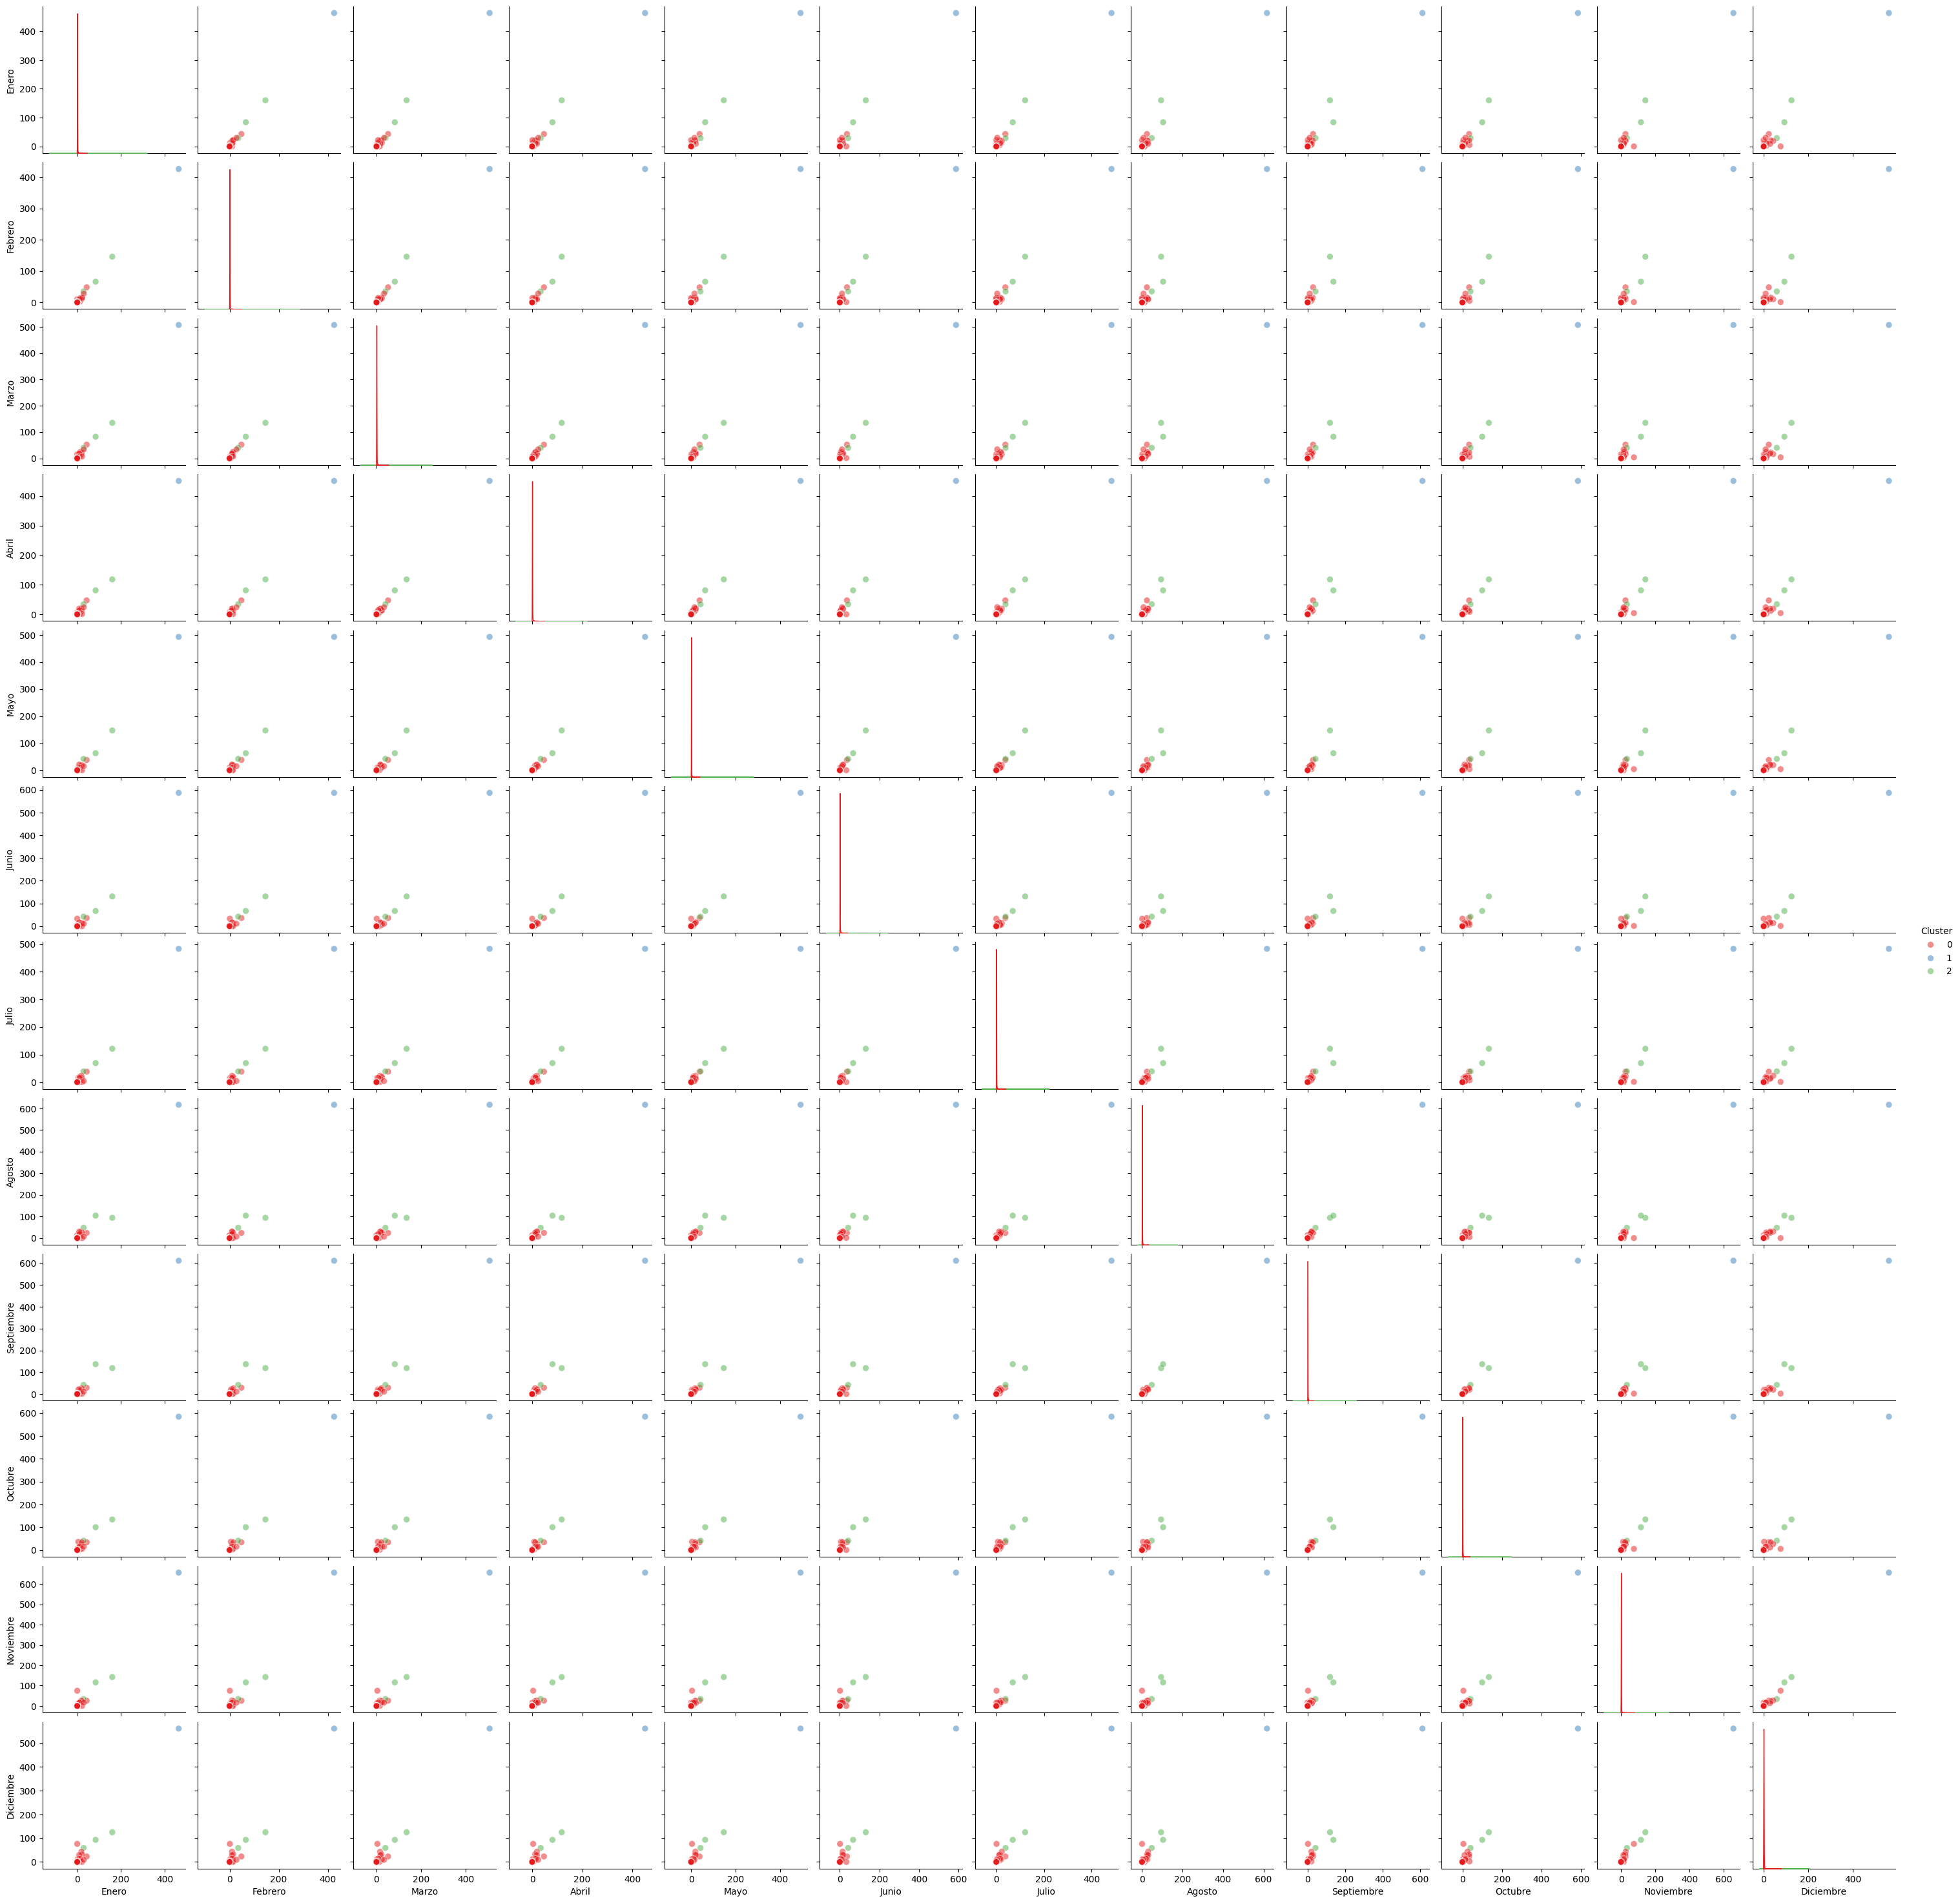

In [67]:
# Crear el gráfico
sns.pairplot(df_sample[columnas_de_datos + ['Cluster']], hue='Cluster', palette='Set1', plot_kws={'alpha':0.5, 's':50})

In [68]:
# Guardar el gráfico como un archivo PNG
plt.savefig('grafico_pairplot.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [69]:
# Mostrar el gráfico (opcional)
plt.suptitle('Pairplot de delitos por mes, coloreado por Cluster (muestra)', y=1.02)
plt.show()


<Figure size 640x480 with 0 Axes>